In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1500)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
# 1.导入数据

In [3]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from IPython.display import SVG
print(tf.__version__)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0

2.0.0-beta1


In [4]:
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 784)   (60000,)
(10000, 784)   (10000,)


In [5]:
# 2.简单的自编码器

In [6]:
code_dim = 32
inputs = layers.Input(shape=(x_train.shape[1],), name='inputs')
code = layers.Dense(code_dim, activation='relu', name='code')(inputs)
outputs = layers.Dense(x_train.shape[1], activation='softmax', name='outputs')(code)

auto_encoder = keras.Model(inputs, outputs)
auto_encoder.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
code (Dense)                 (None, 32)                25120     
_________________________________________________________________
outputs (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [8]:
keras.utils.plot_model(auto_encoder, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [9]:
encoder = keras.Model(inputs,code)
keras.utils.plot_model(encoder, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [13]:
decoder_input = keras.Input((code_dim,))
decoder_output = auto_encoder.layers[-1](decoder_input)
decoder = keras.Model(decoder_input, decoder_output)
keras.utils.plot_model(decoder, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [11]:
!pip install pydot graphviz -i https://pypi.douban.com/simple

Looking in indexes: https://pypi.douban.com/simple
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
auto_encoder.compile(optimizer='adam',
                    loss='binary_crossentropy')

In [15]:
# 训练模型

In [16]:
%%time
history = auto_encoder.fit(x_train, x_train, batch_size=64, epochs=100, validation_split=0.1)


W0712 04:54:58.505131 140010574141184 deprecation.py:323] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/100
54000/54000 [==============================] - 6s 118us/sample - loss: 0.7059 - val_loss: 0.6798
Epoch 2/100
54000/54000 [==============================] - 5s 94us/sample - loss: 0.6798 - val_loss: 0.6744
Epoch 3/100
54000/54000 [==============================] - 5s 83us/sample - loss: 0.6768 - val_loss: 0.6732
Epoch 4/100
54000/54000 [==============================] - 5s 91us/sample - loss: 0.6759 - val_loss: 0.6725
Epoch 5/100
54000/54000 [==============================] - 5s 98us/sample - loss: 0.6753 - val_loss: 0.6722
Epoch 6/100
54000/54000 [==============================] - 5s 100us/sample - loss: 0.6751 - val_loss: 0.6722
Epoch 7/100
54000/54000 [==============================] - 5s 91us/sample - loss: 0.6749 - val_loss: 0.6719
Epoch 8/100
54000/54000 [==============================] - 5s 92us/sample - loss: 0.6747 - val_loss: 0.6718
Epoch 9/100
54000/54000 [==============================] - 4s 77us/sample - loss: 0.6

Epoch 76/100
54000/54000 [==============================] - 3s 57us/sample - loss: 0.6722 - val_loss: 0.6695
Epoch 77/100
54000/54000 [==============================] - 3s 59us/sample - loss: 0.6722 - val_loss: 0.6694
Epoch 78/100
54000/54000 [==============================] - 3s 64us/sample - loss: 0.6721 - val_loss: 0.6694
Epoch 79/100
54000/54000 [==============================] - 3s 58us/sample - loss: 0.6721 - val_loss: 0.6695
Epoch 80/100
54000/54000 [==============================] - 3s 59us/sample - loss: 0.6721 - val_loss: 0.6694
Epoch 81/100
54000/54000 [==============================] - 3s 65us/sample - loss: 0.6720 - val_loss: 0.6693
Epoch 82/100
54000/54000 [==============================] - 3s 58us/sample - loss: 0.6720 - val_loss: 0.6693
Epoch 83/100
54000/54000 [==============================] - 3s 63us/sample - loss: 0.6719 - val_loss: 0.6692
Epoch 84/100
54000/54000 [==============================] - 3s 60us/sample - loss: 0.6719 - val_loss: 0.6692
Epoch 85/100
54000/

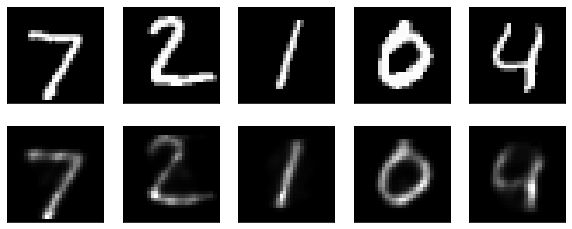

In [18]:
encoded = encoder.predict(x_test)
decoded = decoder.predict(encoded)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

n = 5
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, n+i+1)
    plt.imshow(decoded[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()